# 4.9 - Data Visualization - Part 2 - Contents

1. Creating Bar Charts
2. Creating Histograms and Scatterplots
3. Creating Line Charts
4. Creating Sample Databases
5. Exporting Visualizations

# Exercise 4.9 - Part 2

## Exercise Follow Through

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path
path = r'C:\Users\kaymi\OneDrive\Documents\05-2023-Instacart Basket Analysis'

In [3]:
# Import orders_products_merged_flags
ords_prods_df =  pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_products_merged_flags.pkl'))

### Creating Bar Charts

<Axes: >

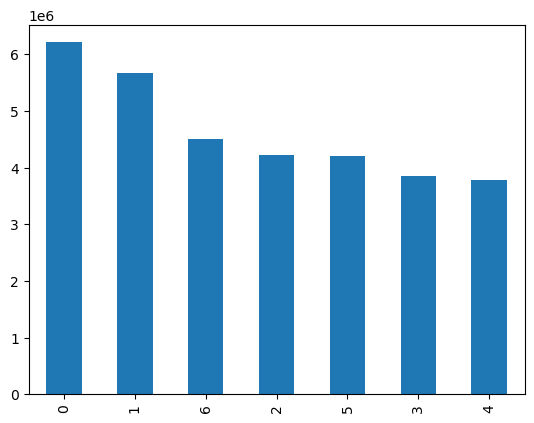

In [4]:
ords_prods_df['orders_day_of_week'].value_counts().plot.bar()

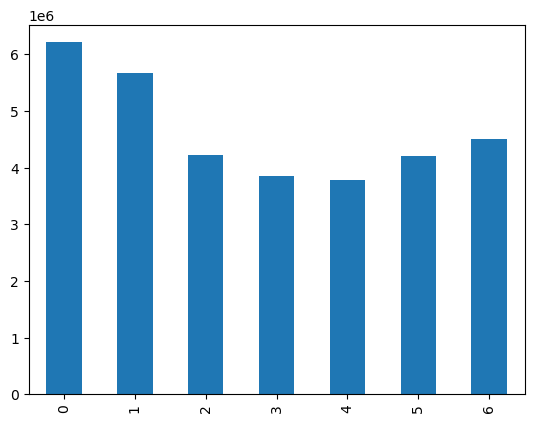

In [5]:
# Change the sorting of bar chart
bar = ords_prods_df['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
# Print frequencies as data (sorted)
ords_prods_df['orders_day_of_week'].value_counts().sort_index()

0    6209632
1    5665830
2    4217766
3    3844096
4    3787193
5    4209449
6    4500246
Name: orders_day_of_week, dtype: int64

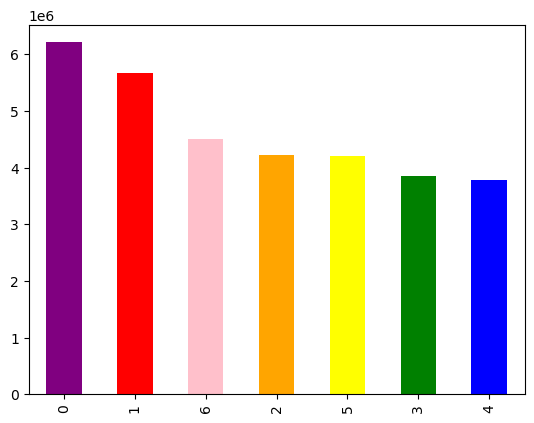

In [7]:
# Adding color
bar = ords_prods_df['orders_day_of_week'].value_counts().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

In [8]:
# Export chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_orders_dow.png'))

## Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

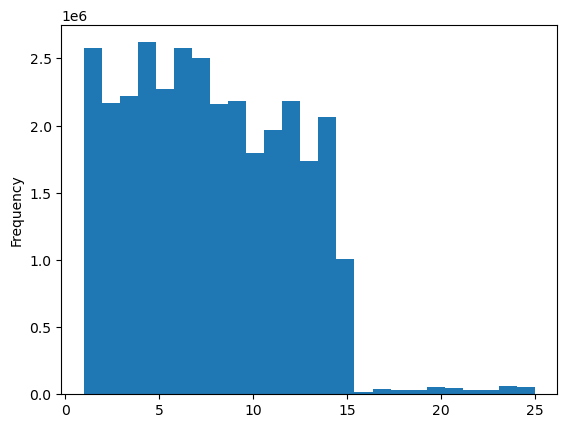

In [9]:
# Create Histogram
ords_prods_df['prices'].plot.hist(bins = 25)

In [10]:
#This graph looks different than exercise follow along as I already corrected for the "outlier" prices in a previous exercise

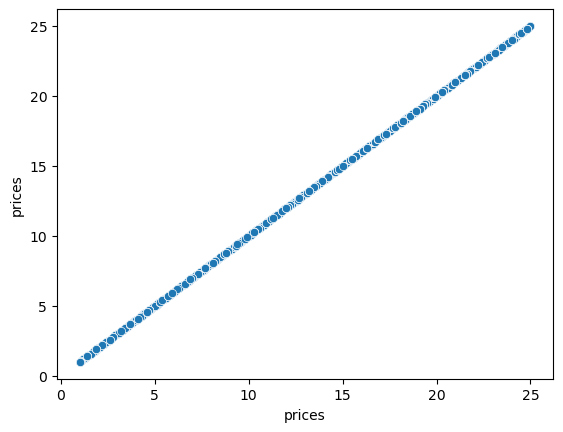

In [53]:
# Create Scatterplot
scat = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_df)

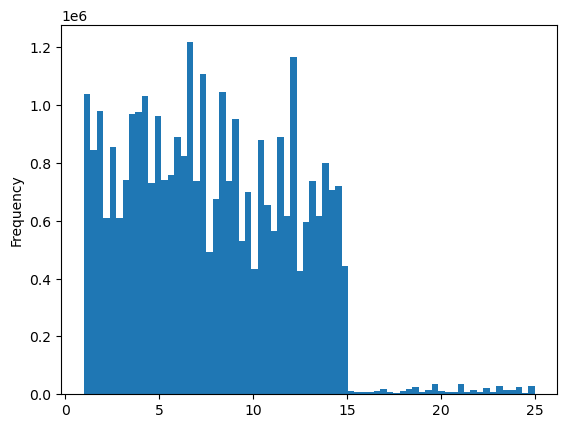

In [12]:
# Create histogram with greater granularity
hist_2 = ords_prods_df['prices'].plot.hist(bins = 70)

In [13]:
# Export Histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','hist_prices.png'))

## Creating Line Charts

### Sampling Data

In [14]:
# Create a list holding True?False values to the test np.random.rand ()
np.random.seed(4)
dev = np.random.rand(len(ords_prods_df)) <= 0.7

In [15]:
dev

array([False,  True, False, ..., False,  True,  True])

In [16]:
# Store 70% of the sample in the dataframe 'big'
big = ords_prods_df[dev]

In [17]:
# Store 30% of the sample in the dataframe 'small'
small = ords_prods_df[~dev]

In [18]:
# Check
len(ords_prods_df)

32434212

In [19]:
len(big) + len(small)

32434212

In [20]:
# Reduce dataset to only required columns
df_2 = small[['orders_day_of_week','prices']]

In [21]:
df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0


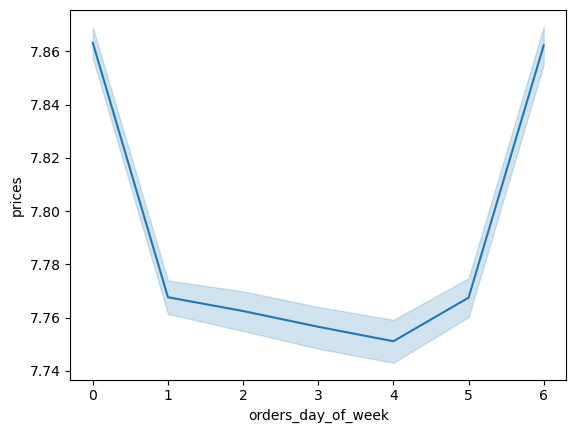

In [22]:
# Create Line Chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [23]:
# Export
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line_prices_dow.png'))

## Task Step 1 - Import Customer data

In [24]:
ords_prods_cust =  pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','customer_merged.pkl'))

## Task Step 2 - See above Exercise follow through

## Task Step 3  - Histogram

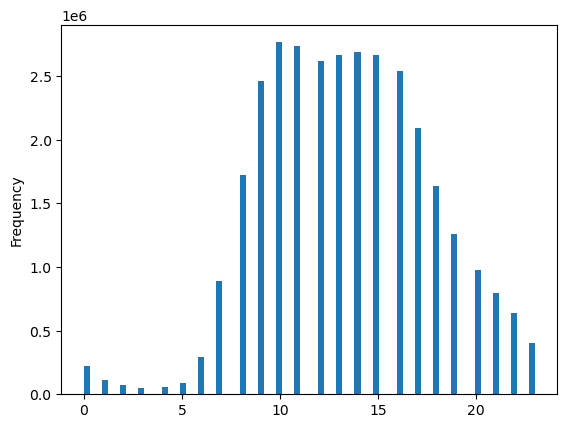

In [46]:
# Create Histogram of "order_hour_of_day column"
hist_hod = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 75)

This histogram shows the frequency of orders for each hour of the day. From this histogram, we can see that the majority of orders occur during 10 AM to 3 PM, and then they begin to decrease.

## Task Step 4 - Bar Chart

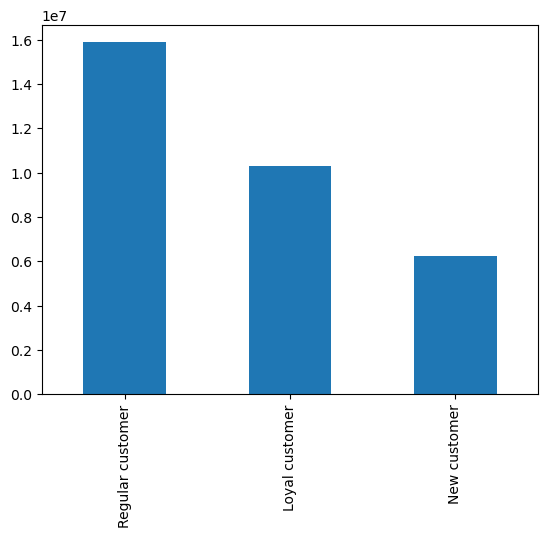

In [45]:
# Create bar chart of loyalty_flag column
loyalty_bar = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

The majority of the customers are "regular" customers

## Task Step 5 - Line Chart

In [27]:
# Create sample for line chart using prices and hour of the day columns
dev_2 = np.random.rand(len(ords_prods_cust)) <= 0.7

In [28]:
# Store 70% of the sample in the dataframe 'big'
big_2 = ords_prods_cust[dev_2]

In [29]:
# Store 30% of the sample in the dataframe 'small'
small_2 = ords_prods_cust[~dev_2]

In [30]:
# Check
len(ords_prods_cust)

32434212

In [31]:
len(big_2) + len(small_2)

32434212

In [32]:
# Reduce dataset to only required columns
df_subset = small_2[['order_hour_of_day','prices']]

In [33]:
df_subset.head()

,order_hour_of_day,prices
3,7,9.0
5,7,9.0
7,14,9.0
11,8,4.4
13,12,4.4


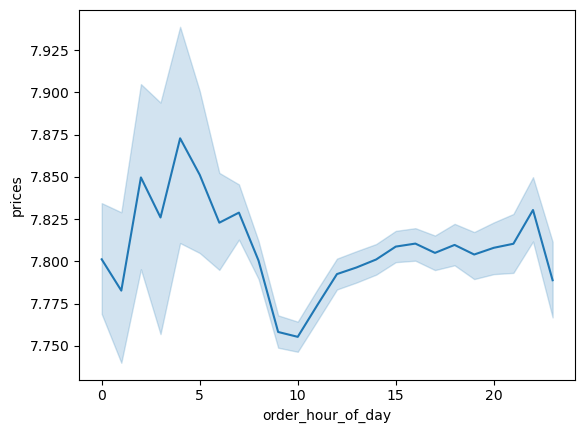

In [34]:
# Create line chart
line_2 = sns.lineplot(data = df_subset, x = 'order_hour_of_day', y = 'prices')

## Task Step 6 - Line chart for age and number of dependents

In [40]:
# Create subset with required columns
df_subset_2 = small_2[['age','n_dependants']]

In [41]:
df_subset_2.head()

,age,n_dependants
3,31,3
5,31,3
7,31,3
11,31,3
13,31,3


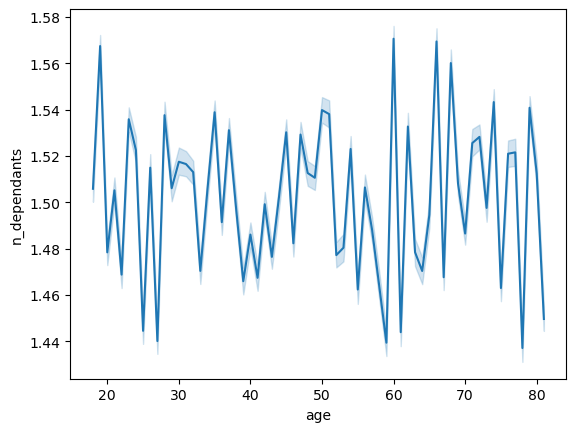

In [43]:
line_age_depend = sns.lineplot(data = df_subset_2, x = 'age', y = 'n_dependants')

There does not appear to be a clear connection between age and number of dependants - there is a lot of variation in the graph between the age groups.

## Task Step 7 - Scatterplot

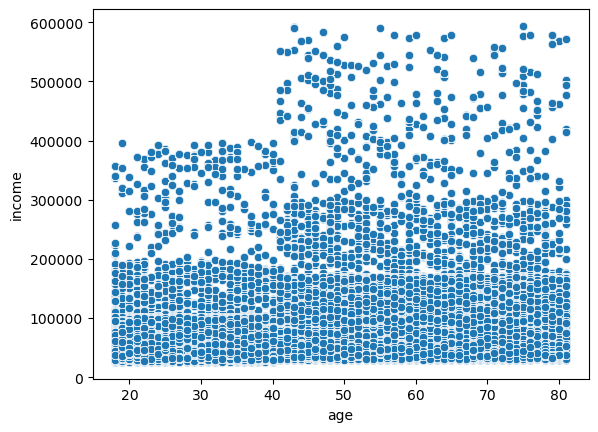

In [44]:
# Create scatterplot for age and spending power (income)
scat_2 = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_cust)

While the majority of people make under 200,000, there does seem to be an increase in those that make over 200,000 from age 40 and on. This makes sense logically as it is fairly common for income to grow with age. There does still appear to be quite a bit of variability though.

## Task Step 8 - Export Visualizations

In [47]:
# Export Hour of Day Histogram
hist_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','hist_hour_of_day.png'))

In [48]:
# Export Loyalty Bar Chart
loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_bar.png'))

In [49]:
# Export Hour of Day Line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line_hour_of_day.png'))

In [50]:
# Export Number of Dependents Line Chart
line_age_depend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line_age_depend.png'))

In [51]:
# Export scatterplot
scat_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','age_inc_scat.png'))

In [54]:
# Export scatterplot from Exercise Follow through
scat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_scat.png'))